In [27]:
import numpy as np
import matplotlib.pyplot as plt


class Stock:
    def __init__(self, expected_return, volatility, current_price, dividend_rate, EPS):   #생성자
        self.expected_return = expected_return  # 기대수익률
        self.volatility = volatility            # 변동성
        self.current_price = current_price      # 현재 주가
        self.dividend_rate = dividend_rate      # 배당률
        self.EPS = EPS                          # 당기 순이익

    def get_future_price(self, T, seed, size):   # (2) T년 후 주가 구하기
        np.random.seed(seed)                 # 난수 생성기의 시드 값을 설정
        z = np.random.standard_normal(size)  # 표준정규분포 N(0,1) 을 따르는 난수를 생성하는 함수
        future_price = self.current_price * np.exp((self.expected_return - 0.5 * self.volatility**2) * T + self.volatility * np.sqrt(T) * z)
        return future_price

    def get_sample_stats(self, T, seed, n):      # (3) 표본평균, 표본분산 구하기
        future_price = self.get_future_price(T, seed, n)
        sample_mean = np.mean(future_price)    # 표본 평균
        sample_variance = np.var(future_price) # 표본 분산
        return sample_mean, sample_variance

    def calculate_dividend(self):                # 배당금 구하기
        dividend = self.dividend_rate * self.current_price
        return dividend

    def calculate_PER(self):                     # PER 구하기
        PER = self.current_price / self.EPS
        return PER
    
    
    def plot_sample_mean(self, T, seed, n):      # 표본 평균과 이론상 평균 비교
        sample_means = []              # 표본 평균과 이론상 평균을 저장할 빈 리스트 생성
        theoretical_means = []         
        sample_sizes = range(1, n+1)   #1부터 n까지 범위 생성

        for size in sample_sizes:
            future_price = self.get_future_price(T, seed, size) # 샘플 크기에 해당하는 미래 주가를 얻음
            sample_mean = np.mean(future_price)
            theoretical_mean = self.current_price * np.exp(self.expected_return * T)
            sample_means.append(sample_mean)
            theoretical_means.append(theoretical_mean)    #각각의 리스트에 계산값 저장

        plt.plot(sample_sizes, sample_means, label='Sample Mean') # n에 따른 각각의 평균값을 그래프로 나타냄
        plt.plot(sample_sizes, theoretical_means, label='Theoretical Mean')
        plt.xlabel('Sample Size (n)')
        plt.ylabel('Mean')               
        plt.legend()
        plt.show()
    
    def plot_sample_variance(self, T, seed, n):   # 표본 분산과 이론상 분산 비교
        sample_variances = []          
        theoretical_variances = []
        sample_sizes = range(1, n+1)    

        for size in sample_sizes:
            future_price = self.get_future_price(T, seed, size)
            sample_variance = np.var(future_price)
            theoretical_variance = self.current_price**2 * np.exp(2 * self.expected_return * T) * (np.exp(self.volatility**2 * T) - 1)
            sample_variances.append(sample_variance)
            theoretical_variances.append(theoretical_variance)

        plt.plot(sample_sizes, sample_variances, label='Sample Variance')
        plt.plot(sample_sizes, theoretical_variances, label='Theoretical Variance')
        plt.xlabel('Sample Size (n)')
        plt.ylabel('Variance')
        plt.legend()
        plt.show()             # 위의 표본 평균과 이론상 평균 비교한 코드와 같은 형식으로 구현함

[118.26408868 137.59731474  89.5087377  126.01994303 128.60727471]
Sample Mean :  115.7506902139987
Sample Variance :  1729.534858075885
Dividend :  3.0
PER :  20.0


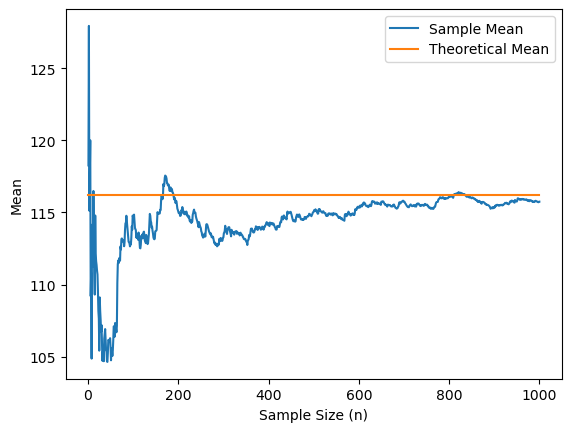

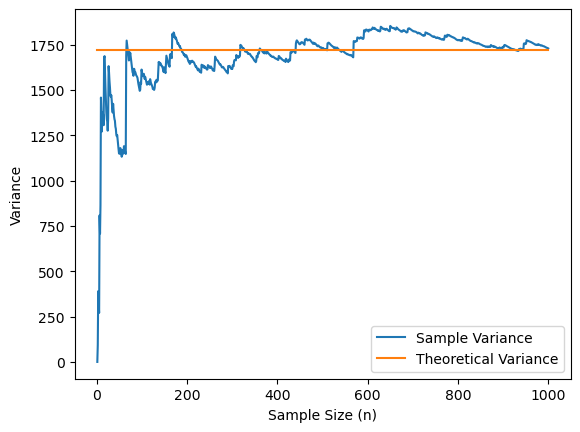

In [28]:
# 클래스 인스턴스 생성 예시
stock = Stock(expected_return=0.05, volatility=0.2, current_price=100, dividend_rate=0.03, EPS=5)

T = 3
seed = 77
size = 5

# get_future_price 함수 호출 예시
future_price = stock.get_future_price(T, seed, size)
print(future_price)

n=1000
# get_sample_stats 함수 호출 예시
sample_mean, sample_variance = stock.get_sample_stats(T, seed, n)
print("Sample Mean : ", sample_mean)
print("Sample Variance : ", sample_variance)

# calculate_dividend 함수 호출 예시
dividend = stock.calculate_dividend()
print("Dividend : ", dividend)

# calculate_PER 함수 호출 예시
PER = stock.calculate_PER()
print("PER : ", PER)

# plot_sample_mean 함수 호출 예시
stock.plot_sample_mean(T, seed, n)

# plot_sample_variance 함수 호출 예시
stock.plot_sample_variance(T, seed, n)